In [1]:
import numpy as np
from tqdm import tqdm_notebook as tqdm
from IPython.display import clear_output
import knapsack

In [2]:
# Import the data
def read_file(file_path):
    tmp_data = []
    with open(file_path, 'r', encoding='utf-8') as file_in:
        for line in file_in.readlines():
            f = line.replace('\n', '').split(" "); 
            for i in range (len(f)):
                try:
                    f[i] = int(f[i])
                except:
                    None
            tmp_data.append(f)
        return tmp_data

a_data = read_file('Data/a_example.txt')
b_data = read_file('Data/b_read_on.txt')
c_data = read_file('Data/c_incunabula.txt')
d_data = read_file('Data/d_tough_choices.txt')
e_data = read_file('Data/e_so_many_books.txt')
f_data = read_file('Data/f_libraries_of_the_world.txt')

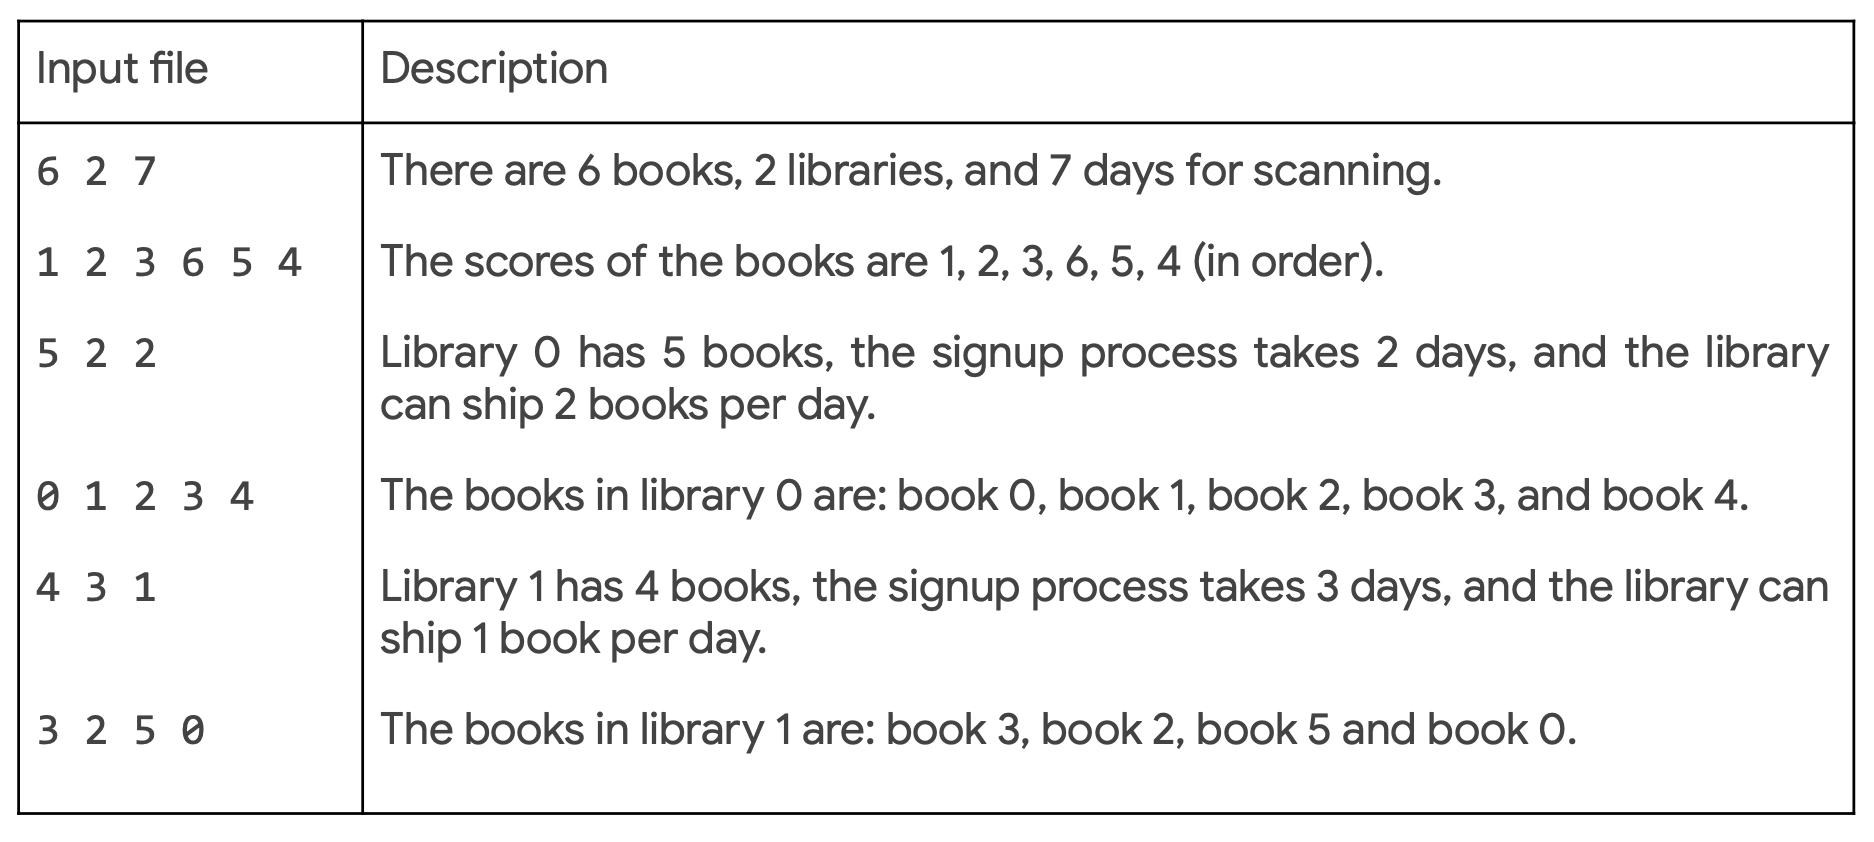

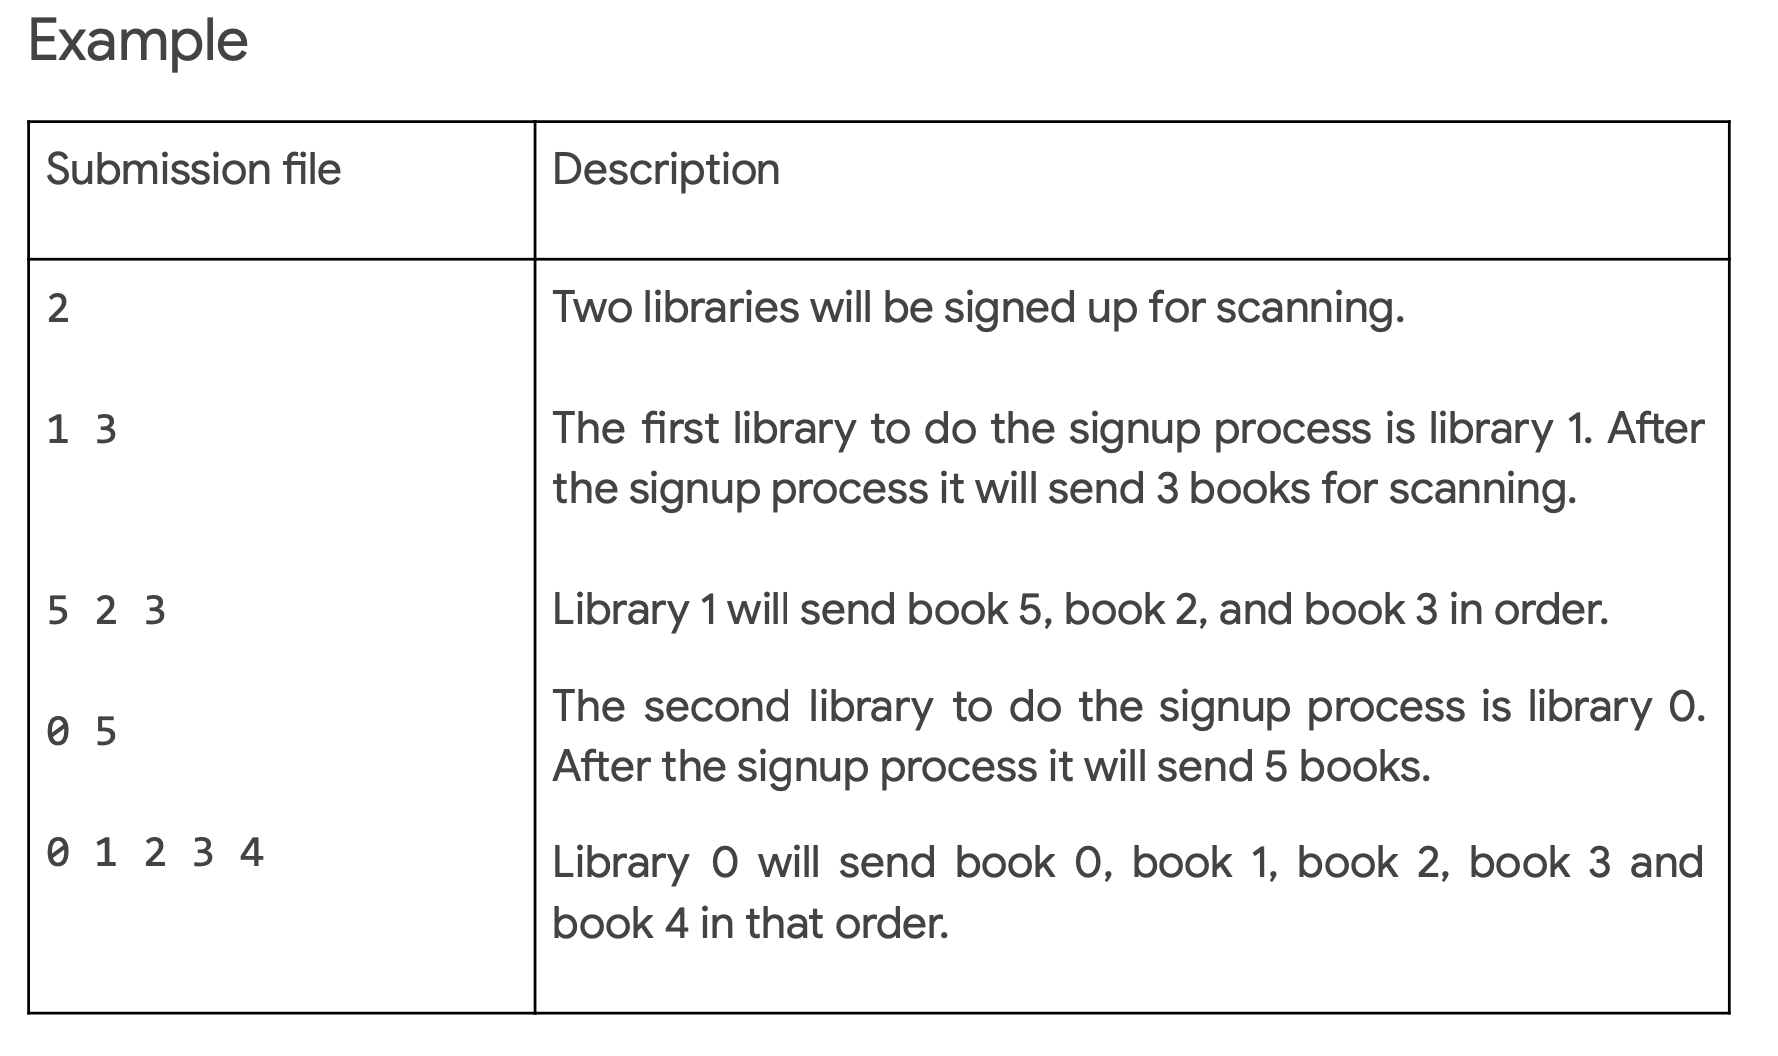

#### Create objects classes

In [3]:
class Book():
    def __init__(self, id, score):
        self.id = id
        self.scores = score

class Library():
    def __init__(self, id, total_book, wait_time, books_per_day, collection):
        self.id = id
        self.total_book = total_book
        self.wait_time = wait_time
        self.books_per_day = books_per_day
        self.collection = collection

#### Score_function from the original solution

In [7]:
def cal_scores(book_scores, library, days_available):
    lib_scores = {}; 
    
    book_scores_lib = []; total_book_score = 0; book_count = 0; index_count = 0; 
    book_rank = {}; book_chosen = []; 
    
#   Rank books' scores
    for b in library.collection:
        book_rank[b] = book_scores[b]
        book_scores_lib.append(book_scores[b])
    
    
    book_scores_lib.sort(reverse = True)
    book_rank = {k: v for k, v in sorted(book_rank.items(), key=lambda item: item[1], reverse = True)}
    #   Calc total score
    for day in range(days_available):
        book_count += library.books_per_day
        if book_count <= library.total_book:
            total_book_score += sum(book_scores_lib[index_count:index_count+library.books_per_day])
            index_count += library.books_per_day

    lib_scores = total_book_score - library.wait_time 
        
    for book_id in book_rank.keys():
        book_chosen.append(book_id)

    return lib_scores, book_chosen, library.wait_time

In [8]:
input_data = a_data

#### Method to use input data to create objects

In [9]:
def input_to_vars(data_in):
    # Set day limit variable
    days_available = data_in[0][2]; num_book_types = data_in[0][0]
    # Put data into objects
    book_scores = {}; library = [] 
    for i in range(num_book_types):
        book_scores[i] = data_in[1][i]
    for i in range(0, data_in[0][1]):
        library.append(Library(i, data_in[(i+1)*2][0], data_in[(i+1)*2][1], \
                               data_in[(i+1)*2][2], data_in[((i+1)*2)+1]))
    print('Days available: {}, Num_Libs: {}, Num_book_types: {}'.format(days_available, len(library), num_book_types))
    return days_available, book_scores, library

days_available, book_scores, library = input_to_vars(input_data)

Days available: 7, Num_Libs: 2, Num_book_types: 6


In [11]:
# calc scores:
lib_val_list = []; lib_wait_list = []; lib_book_chosen = []

with tqdm(total = len(library)) as mars_bar:
    for lib in library:
        score, book_chosen, wait_time = cal_scores(book_scores, lib, days_available)
        lib_val_list.append(score)
        lib_wait_list.append(wait_time)
        lib_book_chosen.append(book_chosen)
#         bar
        mars_bar.update(1)

#### Solution using Knapsack
Knapsack is a package for solving knapsack problem. Maximize sum of selected weight. Sum of selected size is les than capacity.

Algorithm: Dynamic Optimization

In [128]:
# # Example:
# value  = [21, 11, 15]
# weight = [22, 12, 16]
# capacity = 34
# knapsack.knapsack(value, weight).solve(capacity)

In [12]:
book_value_list = []
for i in library[0].collection:
    book_value_list.append(book_scores[i])
    

In [13]:
# Put into our problem
# For libraries
lib_value  = lib_val_list
lib_wait = lib_wait_list
capacity = days_available
ks_output = knapsack.knapsack(lib_wait, lib_value).solve(capacity);

#### Produce output

In [17]:
output_name = 'Data_ex/a_data_ex'
File_out = open(str(output_name),'w+')

out_1 = len(ks_output[1])
File_out.write(str(out_1) + '\n')

for i in range(out_1):
    out_2_0 = ks_output[1][i]
    out_2_1 = len(lib_book_chosen[ks_output[1][i]])
    out_3 = lib_book_chosen[ks_output[1][i]]; out_3 = str(out_3).strip('[]').replace(',', '') 
    
    File_out.write(str(out_2_0)+ ' ')
    File_out.write(str(out_2_1)+ '\n')
    File_out.write(str(out_3) + '\n')

File_out.close()